In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#%matplotlib nbagg

# Finding the value of $\pi$

In [9]:
N = 10000
r = 1
c = [2,4]

xs = (c[0]-r)+2*r*np.random.rand(N)
ys = (c[1]-r)+2*r*np.random.rand(N)

inside = (xs-c[0])**2 + (ys-c[1])**2 <= r**2
print(4*inside.sum()/len(inside))

3.1396


<IPython.core.display.Javascript object>


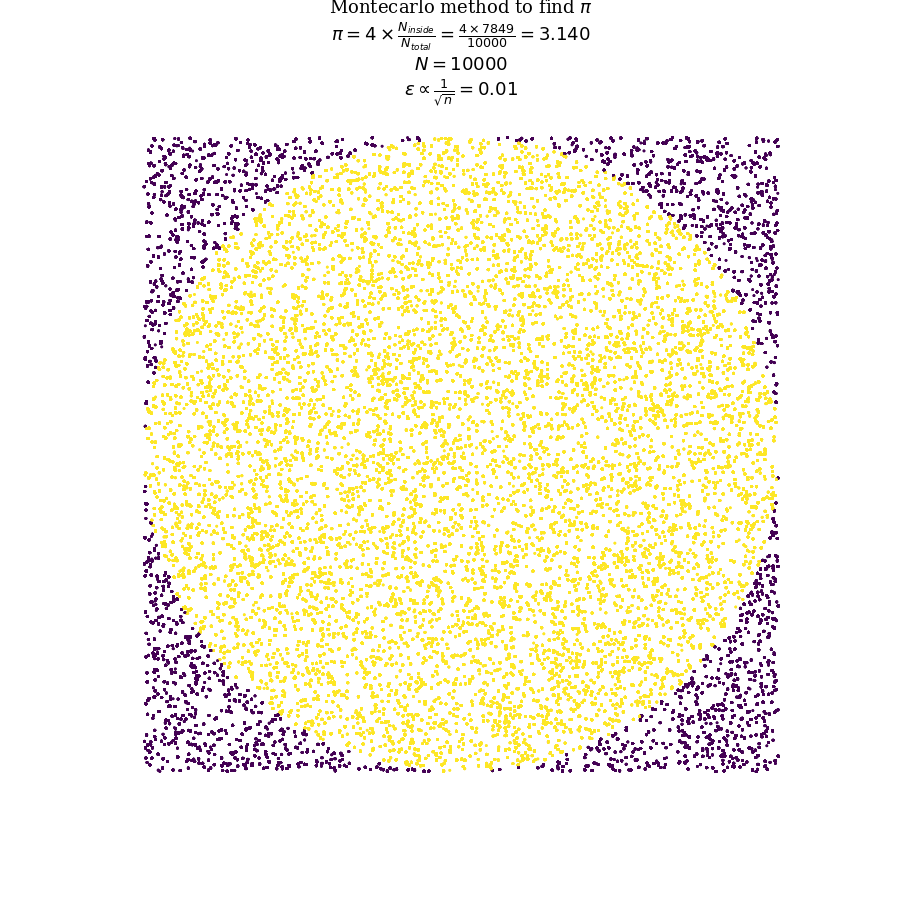

MovieWriter ffmpeg unavailable; using Pillow instead.


In [32]:
fig = plt.figure(figsize=(9,9))
step = 200
frames = [(i+1)*step for i in range(int(N/step))]

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 13}

def init_func():
    pass

def draw(i):
    plt.scatter(xs[0:i], ys[0:i], c=inside[0:i], s=1)
    plt.title("Montecarlo method to find $\pi$\n" +
              "$\pi = 4\\times \\frac{N_{inside}}{N_{total}} = $" +
              "$ \\frac{4\\times%.i}{%.i} = $" %(inside[0:i].sum(), len(inside[0:i])) + 
              f"${4*inside[0:i].sum()/len(inside[0:i]):.3f}$\n$" +
              f"N = {len(inside[0:i])}$\n" +
              "$\epsilon \propto  \\frac{1}{\\sqrt{n}} = %.2f$"%(1/np.sqrt(len(inside[0:i])) ),
              fontdict=font_title
             ) 
    plt.axis("off")
    plt.axis("equal")

animation = FuncAnimation(plt.gcf(), draw, frames=frames, interval=10, repeat=False, init_func=init_func)
#animation.save('./Montecarlo_pi.gif', writer='ffmpeg')

# Monte Carlo Integration